# <center> Statistical Network Analysis Deezer

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
% matplotlib inline

In [3]:
data_HR = pd.read_csv("HR_edges.csv",sep=',')
data_HU = pd.read_csv("HU_edges.csv",sep=",")
data_RO = pd.read_csv("RO_edges.csv",sep=",")
genre = pd.read_csv("HR_genres.csv",sep=",")
genre

,id,genre
0,13357,Pop
1,11542,Indie Rock
2,11543,Dance
3,11540,International Pop
4,11541,Rap/Hip Hop
5,11546,Dance
6,11547,Dance
7,11544,Films/Games
8,11545,Pop
9,11548,Reggae


In [ ]:
df = data_HR[data_HR["node_1"]<50000]
df1 = df[df["node_2"]<50000]
df1.head()
dg = genre[genre["id"]<50000]

In [ ]:
genres = dg["genre"].unique().tolist()

colors = []
for i in range(len(genres)):
    colors.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
genres_colors = {}
for i in range(len(genres)):
    genres_colors[genres[i]] = colors[i]

In [ ]:
stylelist=[]
dg1 = dg.sort_values(by = 'id')
for i in range(len(dg1)):
    stylelist.append(dg1.iloc[i,1])
colorlist=[]
for j in range(len(dg1)):
    colorlist.append(genres_colors[stylelist[j]])
len(colorlist)

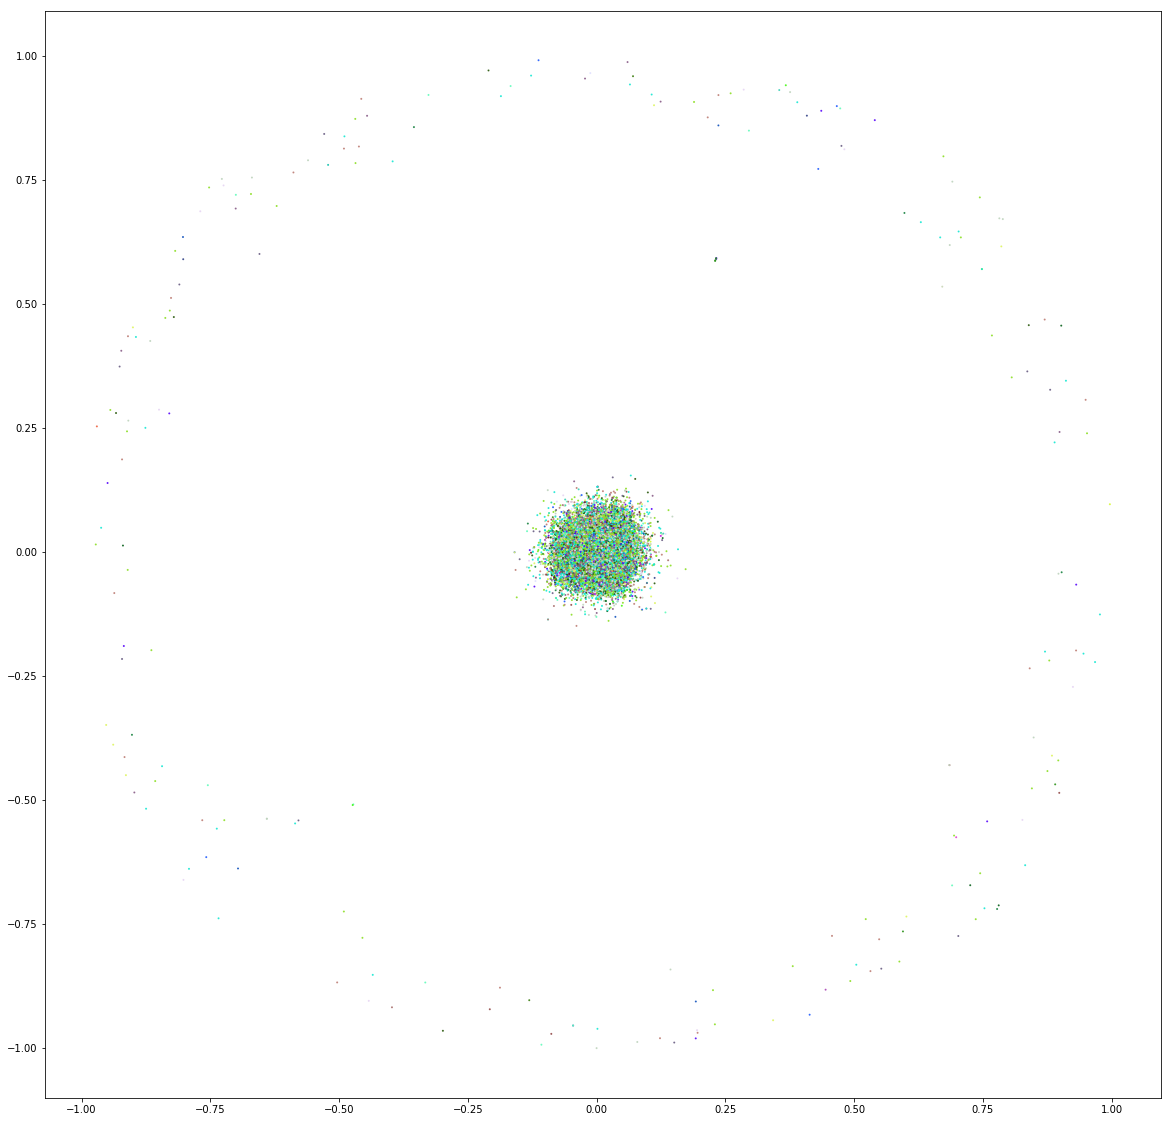

In [7]:
G=nx.Graph()
G.add_nodes_from(range(50000))
for row in range(len(df1)):
    G.add_edge(df1.iloc[row,0],df1.iloc[row,1])
pos=nx.spring_layout(G) 
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G,pos,
                       nodelist=range(50000),
                       node_color=colorlist,
                       node_size=1,alpha=0.8)

plt.show()

Idées : 

I) Etude de chaque dataset <=> Visualisation

Visualisation par Cluster de musique :
- Plus gros le cercle est et plus de user en choix numéro 1 pour ce style
- Liens entre style : Dans chaque cluster : On étudie pour chaque user le nombre de liens amicaux des styles majoritaires. En itérant sur chaque user on construit une proba empirique de liens d'amitiés entre users. 

Visualisation par users : 
- Mise en place de "supers_users" partageant les deux/trois premiers styles en commun => plus le cercle est gros plus de users sont à l'intérieur
- Edges : liens d'amitié moyen entre super users

Mise en place d'une notion de centralité : 
- degree centrality => Evaluer la répartition en degré dans chaque cluster genre (degré = nombre d'amis)
- 

II) Comparaison des deux Datasets 

- Comparer la distribution en degrés


III) Recommendation (globale ou pas fonction de la partie d'avant)
- (Mettre en place une probabilité d'amitié)
-  Mettre en place une recommandation de style musical (content based recommendation)

